<a href="https://colab.research.google.com/github/santiagoprado12/Titanic---Machine-Learning-from-Disaster/blob/main/Proyecto_Final_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
library(ggplot2)

**Subir archivos**

In [2]:
train<-read.csv("train.csv",stringsAsFactors = FALSE)
test<-read.csv("test.csv",stringsAsFactors = FALSE)
str(train)
str(test)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...
'data.frame':	418 obs. of  11 variables:
 $ PassengerId: int  892 893 894 895 896 897 898 899 900 901 ...
 $ Pclass     : int  3 3 2 3 3 3 3 2 3 3 ...
 $ Name       : chr  "Kelly, Mr. James" "Wilkes, Mrs. James (Ellen Needs)" "Myle

**Proporcion de los sobrevivientes**

In [ ]:
table(train$Survived)
prop.table(table(train$Survived))


  0   1 
549 342 


        0         1 
0.6161616 0.3838384 

**Primera prediccion (todos mueren)**

In [ ]:
test$Survived<- rep(0,418)

submit<-data.frame(PassengerId=test$PassengerId,Survived=test$Survived)
write.csv(submit, file = "allDead.csv", row.names = FALSE)

**Porcentaje de supervivencia entre hombres y mujeres**

In [ ]:
prop.table(table(train$Survived,train$Sex),2)

   
       female      male
  0 0.2579618 0.8110919
  1 0.7420382 0.1889081

Del total de los hombres murió el 81.1% y de las mujeres murió el 25.8%

**Prediccion 2: hombres mueren, mujeres viven**

In [ ]:
test$Survived<- rep(0,418)
test$Survived[test$Sex=="female"]<-1
submit<-data.frame(PassengerId=test$PassengerId,Survived=test$Survived)
write.csv(submit, file = "allDead.csv", row.names = FALSE)

**Mujeres y niños primero!!**

In [ ]:
train$Age[is.na(train["Age"])]=mean(train$Age[!is.na(train["Age"])])
summary(train$Age)

train$Child<-0
train$Child[train$Age<18]<-1
train$Child <- factor(train$Child)

test$Child <- 0
test$Child[test$Age<18] <- 1
test$Child <- factor(test$Child)

table(train$Survived[train$Child==1])
aggregate(Survived ~ Child + Sex, data=train, FUN= function(x) {sum(x)/length(x)})
#prop.table(table(train$Survived[train$Child==1],train$Sex[train$Child==1]),2)

**Teniendo en cuenta el costo del tiquete y la clase**

In [ ]:
test$FareBin<- rep(0,418)
train$FareBin[train$Fare < 10] <- '<10'
train$FareBin[train$Fare >= 10 & train$Fare<20] <- '10-20'
train$FareBin[train$Fare >= 20] <- '20+'
table(train$FareBin)
aggregate(Survived ~ FareBin + Sex + Pclass, data=train, FUN= function(x) {sum(x)/length(x)})

test$Survived<- rep(0,418)
test$Survived[test$Sex=="female"]<-1
test$Survived[test$Pclass==3 & test$FareBin=='20+']<-0
submit<-data.frame(PassengerId=test$PassengerId,Survived=test$Survived)
write.csv(submit, file = "allDead.csv", row.names = FALSE)

**Teniendo en cuenta el titulo de la persona**

In [ ]:
 train$Title<-0
 
train$Title<-sapply(train$PassengerId, FUN=function(x){strsplit(train$Name, split='[,.]')[[x]][2]})
train$Title<-sub(" ","", train$Title)
train$Title[train$Title=="Mlle"]<-"Miss"
 train$Title[train$Title=="Mme"]<-"Mrs"
train$Title[train$Title=="Lady"]<-"Miss" 
train$Title[train$Title=="Capt"]<-"Master"
train$Title[train$Title=="Don"]<-"Mr"
train$Title[train$Title=="Dr"]<-"Mr"
train$Title[train$Title=="Ms"]<-"Miss"  
train$Title[train$Title=="Jonkheer"]<-"Mr"  
train$Title[train$Title=="Sir"]<-"Mr" 
train$Title[train$Title=="Major"]<-"Master"  
train$Title[train$Title=="Col"]<-"Master"  
train$Title[train$Title=="Rev"]<-"Master"
train$Title[train$Title=="the Countess"]<-"Mrs"
table(train$Title)


Master   Miss     Mr    Mrs 
    51    186    527    127 

**Teniendo en cuenta el tamaño de la familia**


[1] "female: "


    
             0         1
  1  0.2142857 0.7857143
  2  0.1839080 0.8160920
  3  0.2244898 0.7755102
  4  0.1578947 0.8421053
  5  0.7500000 0.2500000
  6  0.6250000 0.3750000
  7  0.6250000 0.3750000
  8  1.0000000 0.0000000
  11 1.0000000 0.0000000

[1] "male: "


    
             0         1
  1  0.8442822 0.1557178
  2  0.7567568 0.2432432
  3  0.6037736 0.3962264
  4  0.5000000 0.5000000
  5  1.0000000 0.0000000
  6  1.0000000 0.0000000
  7  0.7500000 0.2500000
  8  1.0000000 0.0000000
  11 1.0000000 0.0000000

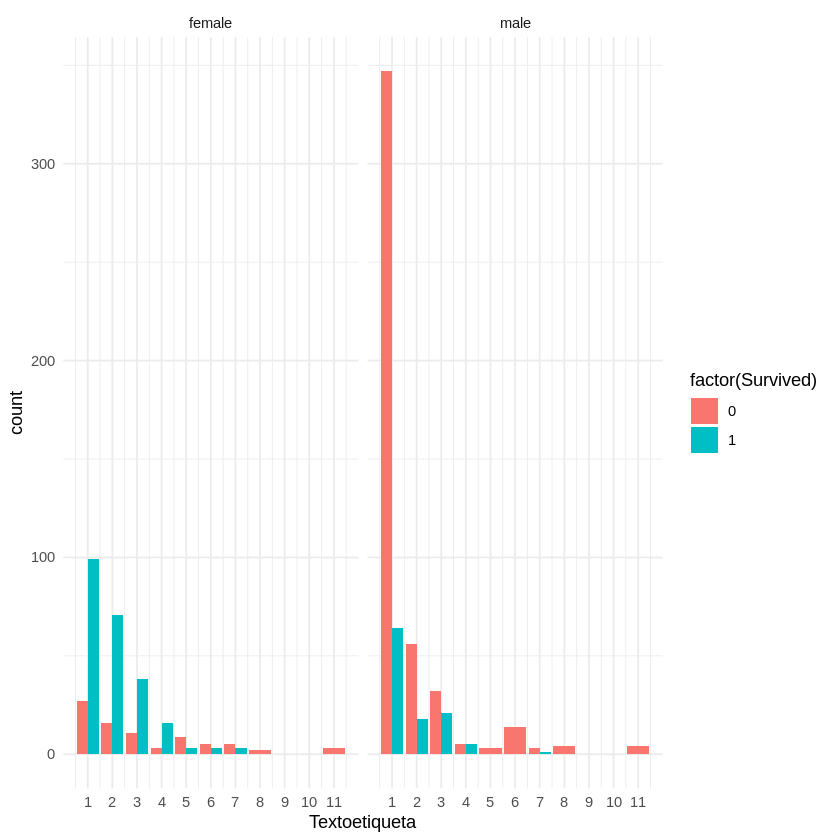

In [25]:
 train$FamilySize<-0

 train$FamilySize<-train$SibSp+train$Parch+1

print("female: ")
prop.table(table(train$FamilySize[train$Sex=='female'],train$Survived[train$Sex=='female']),1)
print('male: ')
prop.table(table(train$FamilySize[train$Sex=='male'],train$Survived[train$Sex=='male']),1)
ggplot(train, aes(x =FamilySize, fill = factor(Survived)))+ geom_bar(stat='count', position='dodge')+scale_x_continuous(breaks=c(1:max(train$FamilySize)))+labs(x = 'Textoetiqueta') + facet_grid(.~Sex)+ theme_minimal()